# **Task 3 - User Experience Analysis**

### **Import Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read data from csv**

In [ ]:
df=pd.read_csv('/content/cleaned_telco_data.csv')

In [ ]:
to_string = ['MSISDN/Number','Handset Type']

for col in to_string:
    df[col] = df[col].astype('category')

In [ ]:
df.columns

Index(['Bearer Id', 'Start', 'Start ms', 'End', 'End ms', 'Dur. (ms)', 'IMSI',
       'MSISDN/Number', 'IMEI', 'Last Location Name', 'Avg RTT DL (ms)',
       'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'TCP DL Retrans. Vol (Bytes)', 'TCP UL Retrans. Vol (Bytes)',
       'DL TP < 50 Kbps (%)', '50 Kbps < DL TP < 250 Kbps (%)',
       '250 Kbps < DL TP < 1 Mbps (%)', 'DL TP > 1 Mbps (%)',
       'UL TP < 10 Kbps (%)', '10 Kbps < UL TP < 50 Kbps (%)',
       '50 Kbps < UL TP < 300 Kbps (%)', 'UL TP > 300 Kbps (%)',
       'HTTP DL (Bytes)', 'HTTP UL (Bytes)', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Dur. (ms).1', 'Handset Manufacturer',
       'Handset Type', 'Nb of sec with 125000B < Vol DL',
       'Nb of sec with 1250B < Vol UL < 6250B',
       'Nb of sec with 31250B < Vol DL < 125000B',
       'Nb of sec with 37500B < Vol UL',
       'Nb of sec with 6250B < Vol DL < 31250B',
       'Nb of sec with 6250B < Vol UL < 37500B',


To conduct user experience analysis we work with parameters like TCP retransmission, round trip time(RTT), throughtput, device type.

**Columns to be Used**

- **Average TCP retransmission**
'TCP DL Retrans. Vol (Bytes)'
'TCP UL Retrans. Vol (Bytes)'
- **Average RTT**
'Avg RTT DL (ms)'
'Avg RTT UL (ms)'
- **Handset Type**
'Handset Type'
- **Average Throughput**
'Avg Bearer TP UL (kbps)'
'Avg Bearer TP DL (kbps)'

In [ ]:
selected_columns = [
    'MSISDN/Number',
    'TCP DL Retrans. Vol (Bytes)',
    'TCP UL Retrans. Vol (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP UL (kbps)', 'Avg Bearer TP DL (kbps)',
    'Handset Type']

In [ ]:
selected_df = df[selected_columns]
selected_df

MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
0       3.366496e+10                 2.080991e+07   
1       3.368185e+10                 2.080991e+07   
2                NaN                 2.080991e+07   
3                NaN                 2.080991e+07   
4       3.369980e+10                 2.080991e+07   
...              ...                          ...   
149996  3.365069e+10                 2.080991e+07   
149997  3.366345e+10                 2.080991e+07   
149998  3.362189e+10                 2.080991e+07   
149999  3.361962e+10                 2.080991e+07   
150000           NaN                 2.080991e+07   

        TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0                     759658.664811        42.000000         5.000000   
1                     759658.664811        65.000000         5.000000   
2                     759658.664811       109.795706        17.662883   
3                     759658.664811       109.795706        17.662883   
4                     759658.664811       109.795706        17.662883   
...                             ...              ...              ...   
149996                759658.664811        32.000000         0.000000   
149997                759658.664811        27.000000         2.000000   
149998                759658.664811        43.000000         6.000000   
149999                759658.664811        37.000000         5.000000   
150000                759658.664811       109.795706        17.662883   

        Avg Bearer TP UL (kbps)  Avg Bearer TP DL (kbps)  \
0                     44.000000                23.000000   
1                     26.000000                16.000000   
2                      9.000000                 6.000000   
3                     44.000000                44.000000   
4                      9.000000                 6.000000   
...                         ...                      ...   
149996                65.000000                52.000000   
149997                54.000000                23.000000   
149998                47.000000                43.000000   
149999                37.000000                34.000000   
150000              1770.428647             13300.045927   

                       Handset Type  
0        Samsung Galaxy A5 Sm-A520F  
1       Samsung Galaxy J5 (Sm-J530)  
2          Samsung Galaxy A8 (2018)  
3                         undefined  
4                  Samsung Sm-G390F  
...                             ...  
149996  Apple iPhone 8 Plus (A1897)  
149997      Apple iPhone Se (A1723)  
149998      Apple iPhone Xs (A2097)  
149999               Huawei Fig-Lx1  
150000             Huawei B528S-23A  

[150001 rows x 8 columns]

# **Task 3.1**
- **handle missing value**
- **handle outliers**

In [ ]:
class DataFrameInformation:
    def __init__(self, df):
        self.df = df

    def get_skewness_missing_count(self):
        print("DataFrame shape:", self.df.shape)
        print(self.df.head())

In [ ]:
dinfo = DataFrameInformation(selected_df)
dinfo.get_skewness_missing_count()

DataFrame shape: (150001, 8)
  MSISDN/Number  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0  3.366496e+10                 2.080991e+07                759658.664811   
1  3.368185e+10                 2.080991e+07                759658.664811   
2           NaN                 2.080991e+07                759658.664811   
3           NaN                 2.080991e+07                759658.664811   
4  3.369980e+10                 2.080991e+07                759658.664811   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP UL (kbps)  \
0        42.000000         5.000000                     44.0   
1        65.000000         5.000000                     26.0   
2       109.795706        17.662883                      9.0   
3       109.795706        17.662883                     44.0   
4       109.795706        17.662883                      9.0   

   Avg Bearer TP DL (kbps)                 Handset Type  
0                     23.0   Samsung Galaxy A5 Sm-A520F  
1      

# **fill the missing with mode**

In [ ]:
class CleanData:
    def __init__(self, df):
        self.df = df

    def fill_mode(self, df, columns):
        for col in columns:
            df[col] = df[col].fillna(df[col].mode()[0])
        return df

cleaner = CleanData(selected_df)
#replace the missing wiht mode

selected_df = cleaner.fill_mode(selected_df.copy(),selected_columns[1:])

# drop the rows with null after mode fillinåg
selected_df = selected_df.dropna(axis=0)
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 125259 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   MSISDN/Number                125259 non-null  category
 1   TCP DL Retrans. Vol (Bytes)  125259 non-null  float64 
 2   TCP UL Retrans. Vol (Bytes)  125259 non-null  float64 
 3   Avg RTT DL (ms)              125259 non-null  float64 
 4   Avg RTT UL (ms)              125259 non-null  float64 
 5   Avg Bearer TP UL (kbps)      125259 non-null  float64 
 6   Avg Bearer TP DL (kbps)      125259 non-null  float64 
 7   Handset Type                 125259 non-null  category
dtypes: category(2), float64(6)
memory usage: 10.2 MB


**Handle outliers**

In [ ]:
selected_df.head()

MSISDN/Number  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0  3.366496e+10                 2.080991e+07                759658.664811   
1  3.368185e+10                 2.080991e+07                759658.664811   
4  3.369980e+10                 2.080991e+07                759658.664811   
5  3.366819e+10                 2.080991e+07                759658.664811   
6  3.366537e+10                 2.080991e+07                759658.664811   

   Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP UL (kbps)  \
0        42.000000         5.000000                     44.0   
1        65.000000         5.000000                     26.0   
4       109.795706        17.662883                      9.0   
5       109.795706        17.662883                     54.0   
6       102.000000         5.000000                     38.0   

   Avg Bearer TP DL (kbps)                 Handset Type  
0                     23.0   Samsung Galaxy A5 Sm-A520F  
1                     16.0  Samsung Galaxy J5 (Sm-J530)  
4                      6.0             Samsung Sm-G390F  
5                     70.0                    undefined  
6                     22.0          Huawei Mate 20 Lite

In [ ]:
from scipy.stats.mstats import winsorize

selected_columns = selected_df.select_dtypes(include='float64').columns
for col in selected_columns:
    selected_df[col] = winsorize(selected_df[col],(0.01,0.15))

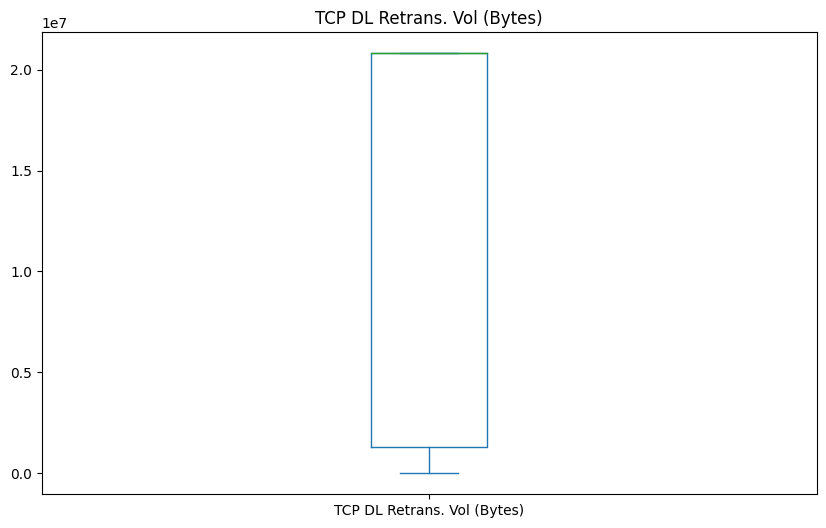

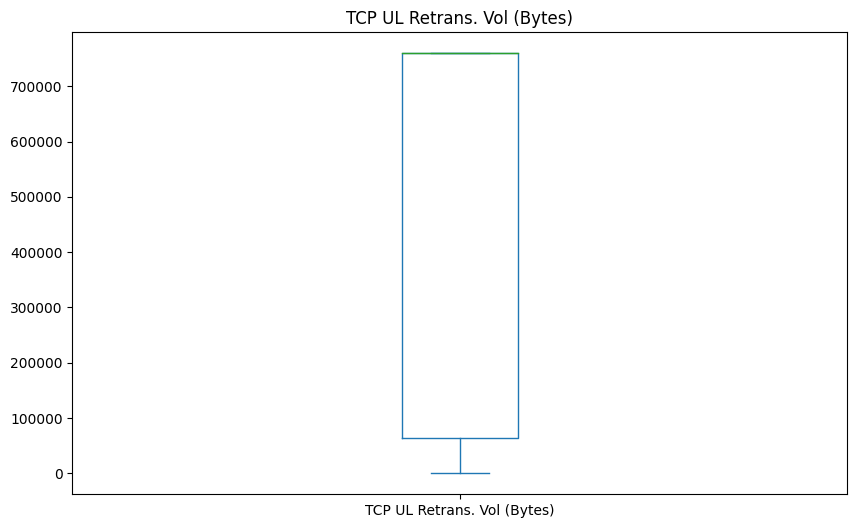

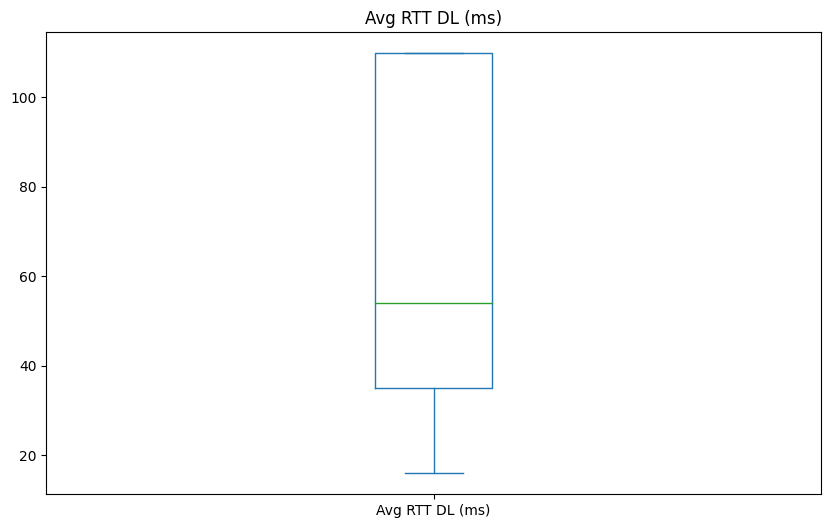

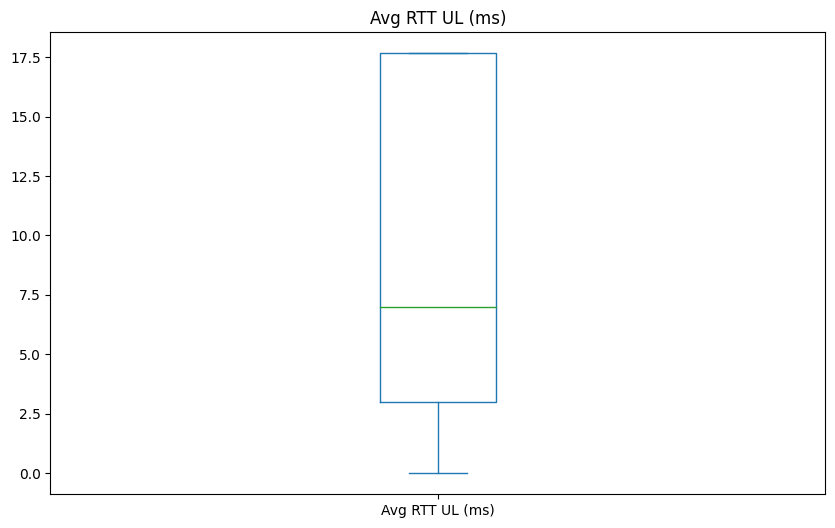

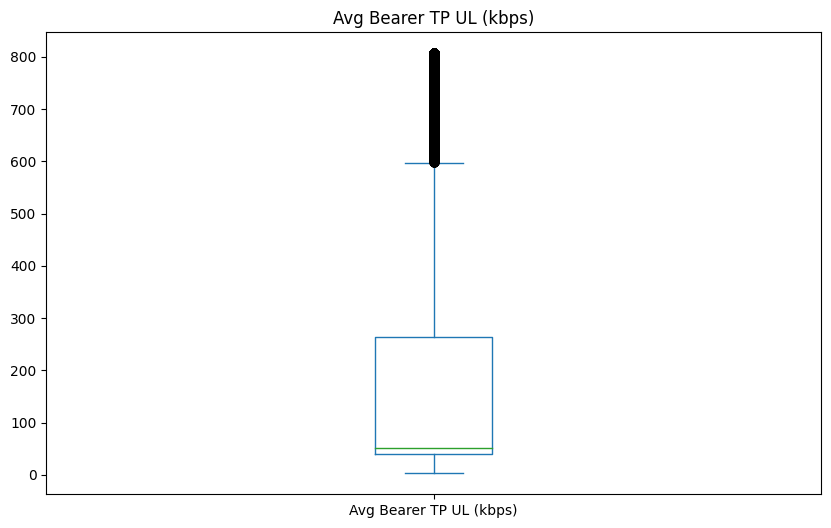

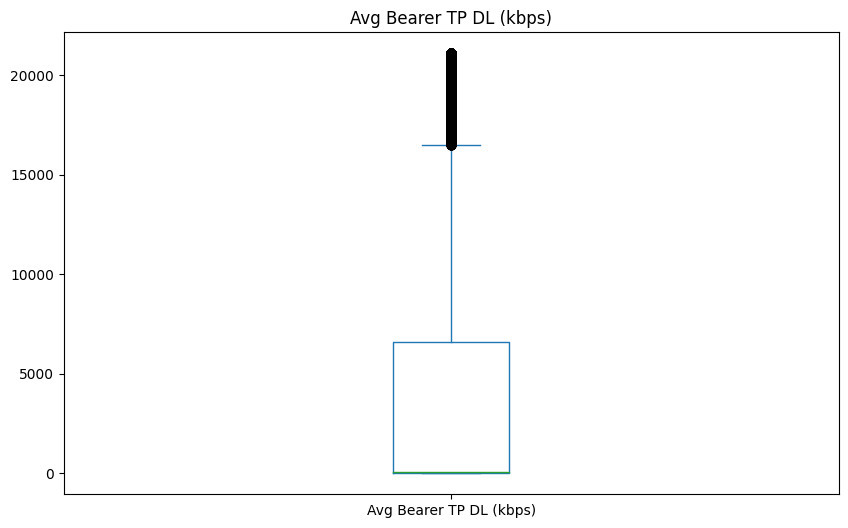

In [ ]:
for col in selected_df.columns.tolist()[1:-1]:
    selected_df[col].plot(kind='box', title=col, figsize=(10, 6))
    plt.show()

In [ ]:
for col in selected_df.columns.tolist()[1:-1]:
    q1 = selected_df[col].quantile(0.25)
    q3 = selected_df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning:


/usr/local/lib/python3.10/dist-p

In [ ]:
agg_df= selected_df.groupby(
    'MSISDN/Number').agg({col: 'sum' for col in selected_df.columns[1:-1]}).reset_index()

# agg_df['Handset Type'] = selected_df.groupby(
    # 'MSISDN/Number').agg({selected_df.columns[-1]:'count'}).reset_index()['Handset Type']
agg_df

<ipython-input-78-e4a900904add>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



MSISDN/Number  TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0      3.360171e+10                 2.080991e+07                759658.664811   
1      3.360171e+10                 5.751940e+05                 44040.000000   
2      3.360171e+10                 3.596273e+07                883805.664811   
3      3.360171e+10                 2.080991e+07                759658.664811   
4      3.360172e+10                 2.080991e+07                759658.664811   
...             ...                          ...                          ...   
90031  3.370000e+10                 2.080991e+07                759658.664811   
90032  3.370000e+10                 2.080991e+07                759658.664811   
90033  3.370000e+10                 7.732280e+05                122288.000000   
90034  3.370000e+10                 6.785000e+03                759658.664811   
90035  3.370000e+10                 2.080991e+07                759658.664811   

       Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP UL (kbps)  \
0           109.795706         5.000000                     47.0   
1           109.795706         7.000000                    807.0   
2           208.795706        35.325766                    879.0   
3            29.000000         5.000000                     54.0   
4           109.795706        17.662883                     64.0   
...                ...              ...                      ...   
90031        37.000000         2.000000                     13.0   
90032       109.795706        17.662883                      9.0   
90033       109.795706        11.000000                    402.0   
90034        20.000000         9.000000                    174.0   
90035       109.795706        17.662883                      9.0   

       Avg Bearer TP DL (kbps)  
0                         23.0  
1                       7677.0  
2                         66.0  
3                         63.0  
4                         12.0  
...                        ...  
90031                      8.0  
90032                      6.0  
90033                   4073.0  
90034                   8018.0  
90035                      6.0  

[90036 rows x 7 columns]

# **Task 3.2**
- **10 top, bottom**
- **10 most frequent**

In [ ]:
paired_columns = [
    ['TCP DL Retrans. Vol (Bytes)',	'TCP UL Retrans. Vol (Bytes)'],
    ['Avg RTT DL (ms)',	'Avg RTT UL (ms)'],
    ['Avg Bearer TP UL (kbps)',	'Avg Bearer TP DL (kbps)']]

<Axes: xlabel='Handset Type'>

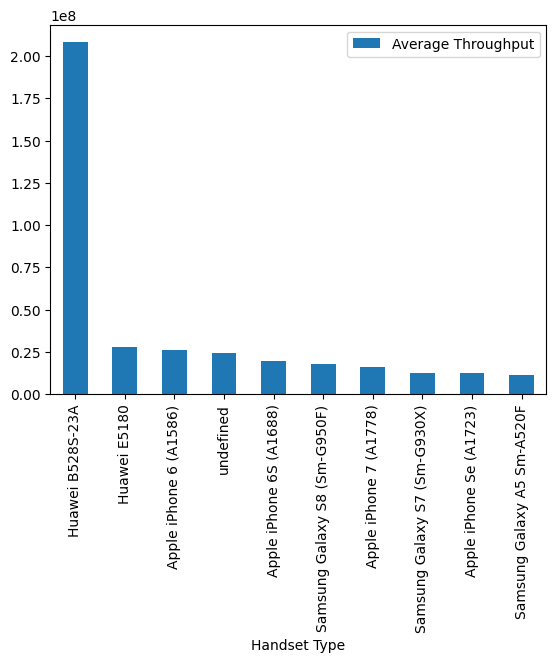

In [ ]:
agg_handset.sort_values('Average Throughput', ascending=False)[:10].plot(
    kind='bar', x='Handset Type', y='Average Throughput', rot=90)

# **Task 3.3**
**- compute - report**

In [ ]:
selected_df

MSISDN/Number  TCP DL Retrans. Vol (Bytes)  \
0       3.366496e+10                 2.080991e+07   
1       3.368185e+10                 2.080991e+07   
4       3.369980e+10                 2.080991e+07   
5       3.366819e+10                 2.080991e+07   
6       3.366537e+10                 2.080991e+07   
...              ...                          ...   
149995  3.366865e+10                 1.655285e+07   
149996  3.365069e+10                 2.080991e+07   
149997  3.366345e+10                 2.080991e+07   
149998  3.362189e+10                 2.080991e+07   
149999  3.361962e+10                 2.080991e+07   

        TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0                     759658.664811        42.000000         5.000000   
1                     759658.664811        65.000000         5.000000   
4                     759658.664811       109.795706        17.662883   
5                     759658.664811       109.795706        17.662883   
6                     759658.664811       102.000000         5.000000   
...                             ...              ...              ...   
149995                162614.000000       109.795706         9.000000   
149996                759658.664811        32.000000         0.000000   
149997                759658.664811        27.000000         2.000000   
149998                759658.664811        43.000000         6.000000   
149999                759658.664811        37.000000         5.000000   

        Avg Bearer TP UL (kbps)  Avg Bearer TP DL (kbps)  \
0                          44.0                     23.0   
1                          26.0                     16.0   
4                           9.0                      6.0   
5                          54.0                     70.0   
6                          38.0                     22.0   
...                         ...                      ...   
149995                    807.0                     23.0   
149996                     65.0                     52.0   
149997                     54.0                     23.0   
149998                     47.0                     43.0   
149999                     37.0                     34.0   

                       Handset Type  
0        Samsung Galaxy A5 Sm-A520F  
1       Samsung Galaxy J5 (Sm-J530)  
4                  Samsung Sm-G390F  
5                         undefined  
6               Huawei Mate 20 Lite  
...                             ...  
149995                    undefined  
149996  Apple iPhone 8 Plus (A1897)  
149997      Apple iPhone Se (A1723)  
149998      Apple iPhone Xs (A2097)  
149999               Huawei Fig-Lx1  

[125259 rows x 8 columns]

# **Conclusion**
Based on the analysis of the dataset, here are the key conclusions:

- **Device Performance:**

Devices with lower average Round-Trip Time (RTT) values and higher average bearer throughput (both uplink and downlink) generally demonstrate better network performance. This suggests that devices with better network optimization and processing capabilities perform more efficiently.
- **Retransmission Volumes:**

The volume of retransmitted data in both uplink and downlink is consistent across many entries, but variations are present. High retransmission volumes can indicate potential issues with network congestion or device performance, affecting the overall user experience.
Handling Undefined Values:

The presence of undefined in the Handset Type column can skew the analysis. Proper handling of these entries—through imputation or exclusion—will be necessary to ensure accurate results.
- **Device-Specific Trends:**

Certain handsets consistently show better performance in terms of lower RTT and higher throughput. Identifying these top-performing devices can help in recommending devices that offer superior network performance.
- **Correlation Insights:**

Correlation analysis between RTT and throughput metrics can provide insights into the relationship between latency and data transfer rates. Devices with lower RTT are likely to have higher throughput, indicating a more efficient data transfer process.
# - **Recommendations:**

For Network Optimization: Target improvements in network infrastructure to address high retransmission volumes and reduce RTT. Enhanced network conditions can improve overall performance.
- **For Device Selection:** Favor devices with lower RTT and higher throughput for users who require optimal network performance. Provide recommendations based on the analysis of top-performing handsets.

In [ ]:
agg_handset = selected_df.groupby('Handset Type').agg(
    {col: 'sum' for col in selected_df.columns[1:-1]}).reset_index()
agg_handset

<ipython-input-82-7b927caf6009>:1: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



Handset Type  \
0                            A-Link Telecom I. Cubot A5   
1                     A-Link Telecom I. Cubot Note Plus   
2                        A-Link Telecom I. Cubot Note S   
3                          A-Link Telecom I. Cubot Nova   
4                         A-Link Telecom I. Cubot Power   
...                                                 ...   
1391  Zte Zte Blade C2 Smartphone Android By Sfr Sta...   
1392                          Zyxel Communicat. Lte7460   
1393                          Zyxel Communicat. Sbg3600   
1394                    Zyxel Communicat. Zyxel Wah7706   
1395                                          undefined   

      TCP DL Retrans. Vol (Bytes)  TCP UL Retrans. Vol (Bytes)  \
0                    0.000000e+00                 0.000000e+00   
1                    6.023490e+05                 1.386400e+04   
2                    2.080991e+07                 6.725200e+04   
3                    1.358400e+05                 1.330000e+03   
4                    7.799000e+03                 2.420000e+02   
...                           ...                          ...   
1391                 2.081257e+07                 1.519317e+06   
1392                 2.080991e+07                 7.596587e+05   
1393                 2.080991e+07                 7.596587e+05   
1394                 2.520000e+02                 7.596587e+05   
1395                 1.131575e+11                 4.423092e+09   

      Avg RTT DL (ms)  Avg RTT UL (ms)  Avg Bearer TP UL (kbps)  \
0            0.000000         0.000000                      0.0   
1          109.795706         8.000000                    172.0   
2          109.795706         4.000000                    422.0   
3           40.000000         4.000000                    550.0   
4           39.000000         4.000000                    342.0   
...               ...              ...                      ...   
1391       219.591412        18.662883                     28.0   
1392        87.000000        17.662883                     40.0   
1393        92.000000        17.662883                     40.0   
1394        33.000000         8.000000                    807.0   
1395    560667.886635     85607.519204                1367315.0   

      Avg Bearer TP DL (kbps)  
0                         0.0  
1                      6527.0  
2                      8515.0  
3                        23.0  
4                        23.0  
...                       ...  
1391                     91.0  
1392                  21107.0  
1393                     23.0  
1394                   1263.0  
1395               22899871.0  

[1396 rows x 7 columns]

In [ ]:
agg_handset['Average Throughput'] = agg_handset[agg_handset.columns[5]
                                                ] + agg_handset[agg_handset.columns[6]]

agg_handset['Average TCP Retrans'] = agg_handset[agg_handset.columns[1]
                                                 ] + agg_handset[agg_handset.columns[2]]

agg_handset.head()

Handset Type  TCP DL Retrans. Vol (Bytes)  \
0         A-Link Telecom I. Cubot A5                 0.000000e+00   
1  A-Link Telecom I. Cubot Note Plus                 6.023490e+05   
2     A-Link Telecom I. Cubot Note S                 2.080991e+07   
3       A-Link Telecom I. Cubot Nova                 1.358400e+05   
4      A-Link Telecom I. Cubot Power                 7.799000e+03   

   TCP UL Retrans. Vol (Bytes)  Avg RTT DL (ms)  Avg RTT UL (ms)  \
0                          0.0         0.000000              0.0   
1                      13864.0       109.795706              8.0   
2                      67252.0       109.795706              4.0   
3                       1330.0        40.000000              4.0   
4                        242.0        39.000000              4.0   

   Avg Bearer TP UL (kbps)  Avg Bearer TP DL (kbps)  Average Throughput  \
0                      0.0                      0.0                 0.0   
1                    172.0                   6527.0              6699.0   
2                    422.0                   8515.0              8937.0   
3                    550.0                     23.0               573.0   
4                    342.0                     23.0               365.0   

   Average TCP Retrans  
0         0.000000e+00  
1         6.162130e+05  
2         2.087717e+07  
3         1.371700e+05  
4         8.041000e+03

<Axes: xlabel='Handset Type'>

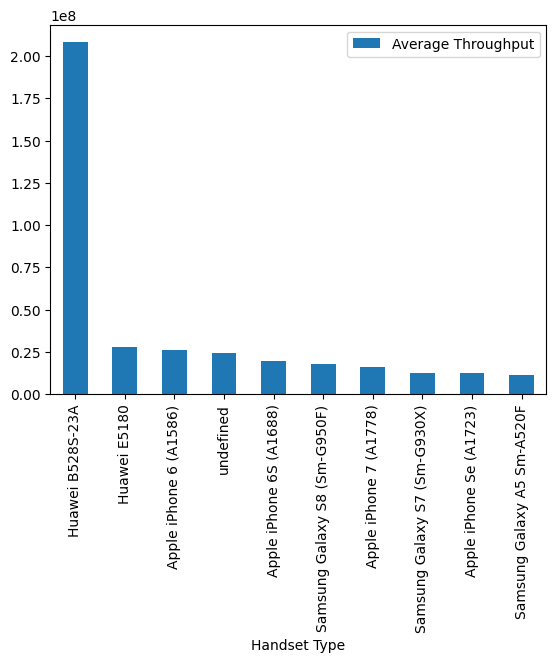

In [ ]:
agg_handset.sort_values('Average Throughput', ascending=False)[:10].plot(
    kind='bar', x='Handset Type', y='Average Throughput', rot=90)

<Axes: xlabel='Handset Type'>

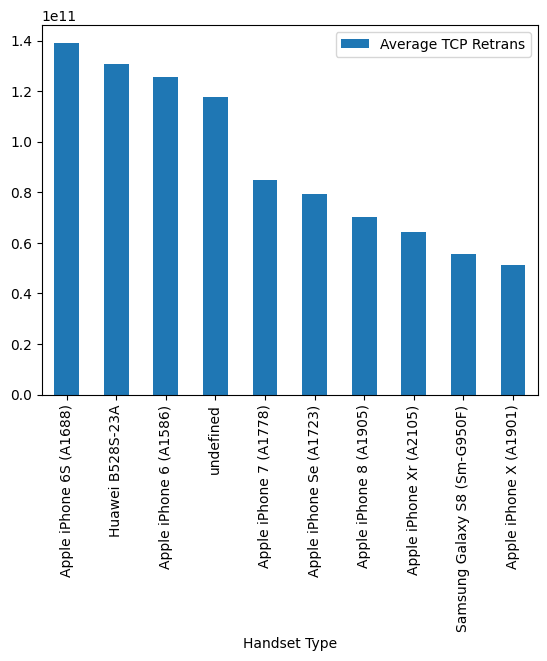

In [ ]:
agg_handset.sort_values('Average TCP Retrans',ascending=False)[:10].plot(kind='bar',x='Handset Type',y='Average TCP Retrans',rot=90)

In [ ]:
# Check if the column exists, and if it does, proceed with setting it as the index
if 'MSISDN/Number' in total_df.columns:
    total_df = total_df.set_index('MSISDN/Number')
    print(total_df)  # Display the DataFrame with the new index
else:
    print("Column 'MSISDN/Number' not found in DataFrame. Check your data.")
    print(total_df.columns) # Print available columns to help identify the correct one

Column 'MSISDN/Number' not found in DataFrame. Check your data.
Index(['Average TCP Retrans', 'Average RTT', 'Average Throughput',
       'experience_score'],
      dtype='object')


In [ ]:
normalized_df = (total_df - total_df.mean())/total_df.std()
normalized_df

Average TCP Retrans  Average RTT  Average Throughput  \
MSISDN/Number                                                         
33601712373.0             0.286730     0.303194           -0.613130   
33601712551.0            -1.257211     0.333766            0.121190   
33601713789.0             1.412570     2.280122           -0.532493   
33601717042.0             0.286730     0.496764           -0.612610   
33601718622.0             1.876306     0.199312           -0.082831   
...                            ...          ...                 ...   
33699997234.0             0.286730    -0.870738           -0.611309   
33699998526.0             0.286730    -0.855452           -0.613390   
33699998818.0             0.286730    -0.855452           -0.617379   
33699999410.0            -1.236850     0.394912           -0.231186   
33699999495.0            -1.246362    -1.008316            0.091103   

               experience_score  
MSISDN/Number                    
33601712373.0         -0.139664  
33601712551.0         -0.898483  
33601713789.0          1.764377  
33601717042.0         -0.078116  
33601718622.0          0.797418  
...                         ...  
33699997234.0         -0.040084  
33699998526.0         -0.044454  
33699998818.0         -0.043038  
33699999410.0         -0.608547  
33699999495.0         -0.712637  

[65881 rows x 4 columns]

In [ ]:
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(normalized_df)

centroids = Kmean.cluster_centers_
centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



array([[ 1.53244934,  2.57136954,  1.4506432 ,  2.79432621],
       [-0.94984376, -0.11980484,  0.56015229, -0.54791478],
       [ 0.43633202, -0.2085507 , -0.51827691,  0.0399557 ]])

In [ ]:
total_df

Average TCP Retrans  Average RTT  Average Throughput  \
MSISDN/Number                                                         
33601712373.0         2.156957e+07   114.795706                70.0   
33601712551.0         6.192340e+05   116.795706              8539.0   
33601713789.0         3.684654e+07   244.121472              1000.0   
33601717042.0         2.156957e+07   127.458589                76.0   
33601718622.0         4.313915e+07   108.000000              6186.0   
...                            ...          ...                 ...   
33699997234.0         2.156957e+07    38.000000                91.0   
33699998526.0         2.156957e+07    39.000000                67.0   
33699998818.0         2.156957e+07    39.000000                21.0   
33699999410.0         8.955160e+05   120.795706              4475.0   
33699999495.0         7.664437e+05    29.000000              8192.0   

               experience_score  
MSISDN/Number                    
33601712373.0          1.759813  
33601712551.0          0.828282  
33601713789.0          4.097227  
33601717042.0          1.835370  
33601718622.0          2.910181  
...                         ...  
33699997234.0          1.882058  
33699998526.0          1.876693  
33699998818.0          1.878432  
33699999410.0          1.184209  
33699999495.0          1.056427  

[65881 rows x 4 columns]

In [ ]:
np.sqrt(np.sum(np.power(normalized_df.iloc[0]-centroids[0,:],2)))

4.423109625640237

In [ ]:
total_df['experience_score'] = normalized_df.apply(lambda x: np.sqrt(np.sum(np.power(x-centroids[0,:], 2))), axis=1)
# Use centroids[0,:] to select the first centroid (as an example) and calculate the distance
total_df.to_csv('user_experience_score.csv',index=True)
total_df

Average TCP Retrans  Average RTT  Average Throughput  \
MSISDN/Number                                                         
33601712373.0         2.156957e+07   114.795706                70.0   
33601712551.0         6.192340e+05   116.795706              8539.0   
33601713789.0         3.684654e+07   244.121472              1000.0   
33601717042.0         2.156957e+07   127.458589                76.0   
33601718622.0         4.313915e+07   108.000000              6186.0   
...                            ...          ...                 ...   
33699997234.0         2.156957e+07    38.000000                91.0   
33699998526.0         2.156957e+07    39.000000                67.0   
33699998818.0         2.156957e+07    39.000000                21.0   
33699999410.0         8.955160e+05   120.795706              4475.0   
33699999495.0         7.664437e+05    29.000000              8192.0   

               experience_score  
MSISDN/Number                    
33601712373.0          4.423110  
33601712551.0          5.309742  
33601713789.0          2.256728  
33601717042.0          4.285294  
33601718622.0          3.476217  
...                         ...  
33699997234.0          5.068081  
33699998526.0          5.061011  
33699998818.0          5.061845  
33699999410.0          5.178232  
33699999495.0          5.889235  

[65881 rows x 4 columns]

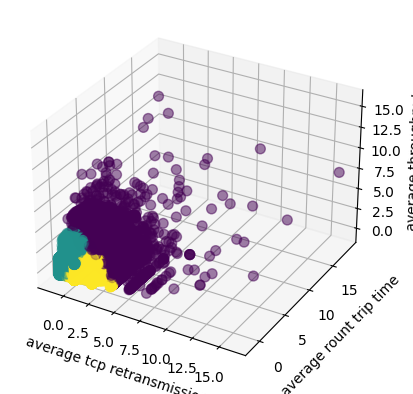

In [ ]:
# Create the figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate the values
x_vals = normalized_df['Average TCP Retrans']
y_vals = normalized_df['Average RTT']
z_vals = normalized_df['Average Throughput']

# # Plot the values

# ax.scatter(centroids_df[0], centroids_df[1], centroids_df[2], c='red', s=100)
ax.scatter(x_vals, y_vals, z_vals,
           c=Kmean.labels_.astype(float), s=50, alpha=0.5)

ax.set_xlabel('average tcp retransmission')
ax.set_ylabel('average rount trip time')
ax.set_zlabel('average throughput')

plt.show()
#

In [ ]:
import plotly.express as px
fig = px.scatter_3d(normalized_df, x='Average TCP Retrans', y='Average RTT', z='Average Throughput',
                    color=Kmean.labels_.astype(float))

fig = px.scatter_3d(normalized_df, x='Average TCP Retrans', y='Average RTT', z='Average Throughput',
                    color=Kmean.labels_.astype(float))
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()


# **Interpretation:**
The 3D scatter plot visualizes clusters based on three key metrics: Average TCP Retrans, Average RTT, and Average Throughput.

The clusters are color-coded, with each color representing a different cluster. In this plot:

- **Cluster 0 (dark blue):**Represents users with lower Average TCP Retrans, Average RTT, and relatively lower Average Throughput.
- **Cluster 1 (purple):** Represents users with moderate values for Average TCP Retrans, Average RTT, and throughput.
- **Cluster 2 (yellow):** Represents users with higher values for Average TCP Retrans, Average RTT, and Average Throughput.
Cluster 0 users seem to have the most optimal experience, with lower network issues and stable throughput.

Cluster 1 users are in between, experiencing moderate network parameters, indicating they might face occasional issues.

Cluster 2 users are likely facing the most network challenges, with higher retransmissions and latency, possibly leading to poor user experience.

# **Recommendations**:
- **Targeted Network Optimization:**

Focus on Cluster 2 users to improve their network experience. Reducing TCP retransmissions and RTT might help improve their throughput and overall satisfaction.
Analyze the specific conditions and locations where these users are experiencing higher latency and retransmissions to deploy targeted solutions.
- **Customer Support Prioritization:**

Consider offering enhanced customer support to Cluster 2 users, as they are likely to be the most dissatisfied.
Monitor the experience of Cluster 1 users to prevent them from migrating to Cluster 2.
- **Handset Analysis:**

Further analysis should be conducted on the handsets used by Cluster 2 users. There may be a correlation between certain handset types and poor network performance.
If a specific handset type is more prone to issues, consider collaborating with manufacturers for firmware updates or advising customers on better-performing devices.
- **Continuous Monitoring:**

Keep monitoring these clusters over time to see if interventions are effective.
Update the clusters periodically as network conditions and user behavior evolve.